In [761]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from mycolorpy import colorlist as mcp

# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

from random import seed
from random import randrange

from sklearn.metrics.cluster import adjusted_rand_score

In [762]:
#An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5).
#After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.Content 
#In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). 
#Then, they performed segmented outreach and communication for different segment of customers.
#This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.
#You are required to help the manager to predict the right group of the new customers.#

In [763]:
data=pd.read_csv("customersegmentation.csv")

In [764]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458982,Male,Yes,61,Yes,Executive,1.0,High,3.0,Cat_6,C
1,458983,Female,Yes,63,Yes,Executive,0.0,High,5.0,Cat_6,C
2,458984,Male,Yes,39,Yes,Artist,0.0,Average,3.0,Cat_6,C
3,458985,Male,No,23,No,Healthcare,1.0,Low,4.0,Cat_6,D
4,458986,Male,No,18,No,Healthcare,7.0,Low,4.0,Cat_6,D


In [765]:
data.shape

(10695, 11)

In [766]:
# Looking for missing values in dataset

data.isna().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [767]:
data = data.dropna()
data.shape

(8819, 11)

In [768]:
data.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Gender Data Visualisation

In [769]:
data['Gender'].dtype

dtype('O')

In [770]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [771]:
data['Gender'].value_counts()

Male      4861
Female    3958
Name: Gender, dtype: int64

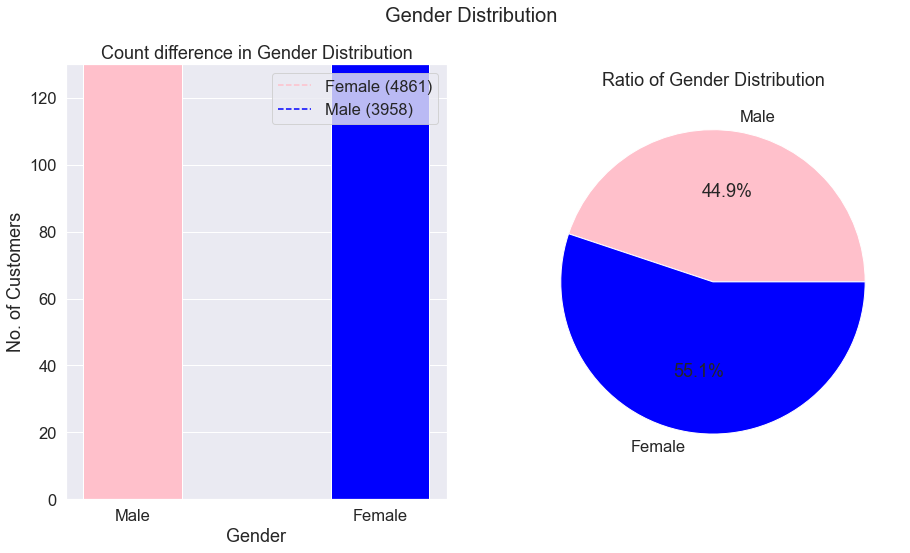

In [772]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['pink','blue'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='pink', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='blue', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['pink','blue'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=20);
plt.show()

In [773]:
data.Gender=pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes

Age Data Visualisation

In [774]:
data['Age'].describe()

count    8819.000000
mean       43.517859
std        16.581537
min        18.000000
25%        31.000000
50%        41.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

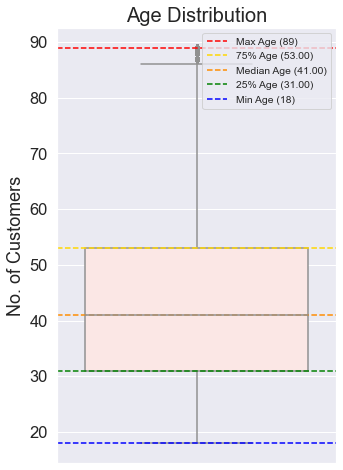

In [775]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="mistyrose")
ax.axhline(y=data['Age'].max(), linestyle='--',color='red', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='gold', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='darkorange', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='green', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='blue', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

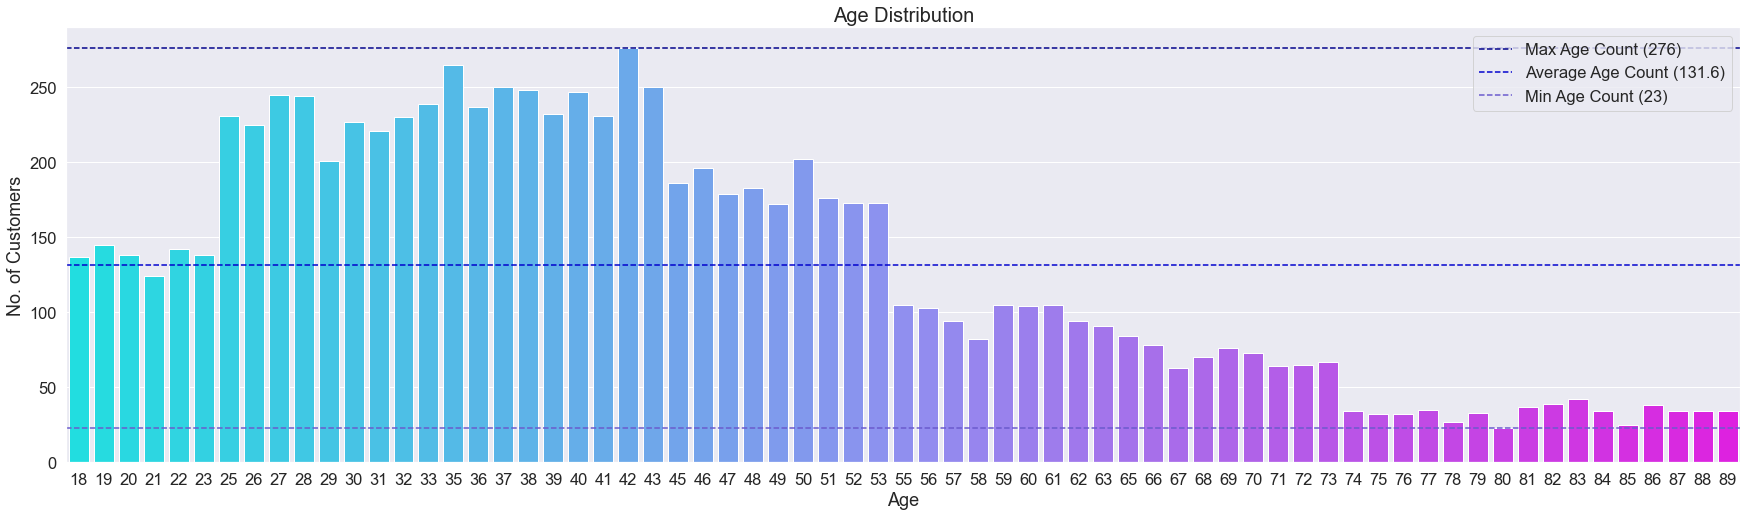

In [776]:
fig, ax = plt.subplots(figsize=(30,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], palette='cool')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='darkblue', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='mediumblue', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='slateblue', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

Profession Data Visualisation

C:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

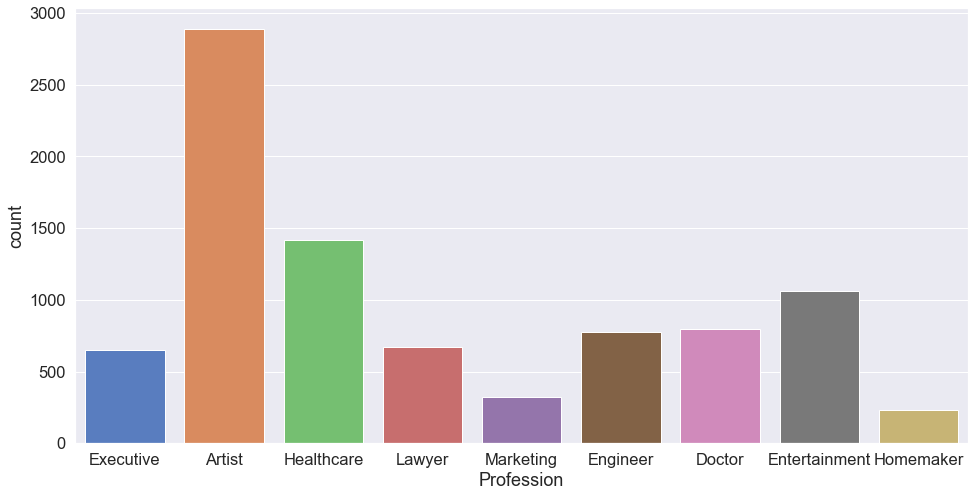

In [777]:
plt.figure(figsize=(16,8))
sns.countplot(data.Profession,palette='muted')

In [778]:
profession=pd.get_dummies(data.Profession)
data.drop(['Profession'],axis=1,inplace=True)
data=data.join(profession)

Graduated Data Visualisation

C:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='count'>

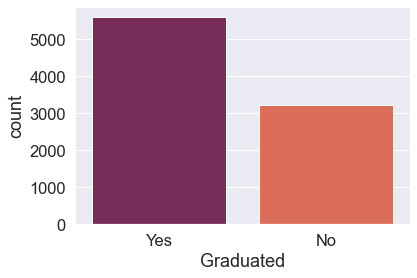

In [779]:
sns.countplot(data.Graduated,palette='rocket')

In [780]:
data.Graduated=pd.Categorical(data.Graduated,categories=['No','Yes'],ordered=True).codes

Spending Score Visualisation

C:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

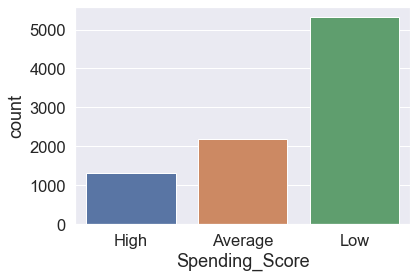

In [781]:
sns.countplot(data.Spending_Score)

In [782]:
data.Spending_Score=pd.Categorical(data.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

Var_1 Visualisation

C:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Var_1', ylabel='count'>

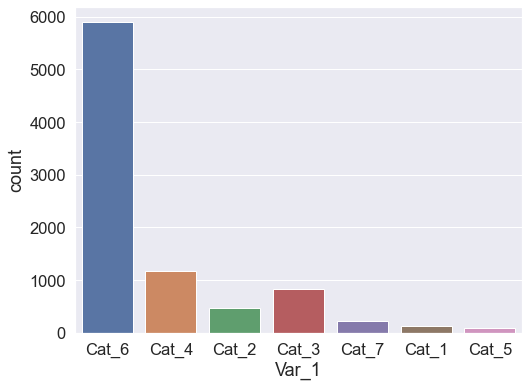

In [783]:
#Var_1 is income range attribute with cat_1 being the highest paid and cat_6 being the lowest paid

plt.figure(figsize=(8,6))
sns.countplot(data.Var_1)

In [784]:
data.Var_1=pd.Categorical(data.Var_1).codes

Marital Status Data Visualisation

C:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

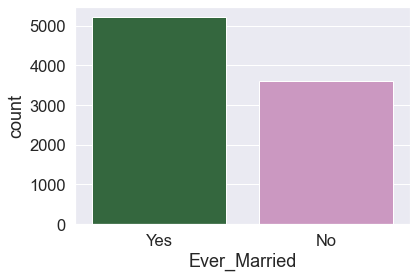

In [785]:
sns.countplot(data.Ever_Married,palette='cubehelix')

In [786]:
data.Ever_Married=pd.Categorical(data.Ever_Married,categories=['No','Yes'],ordered=True).codes

Work Experience Data Visualisation

(array([5729.,  337.,  631.,  248.,  242.,  771.,  569.,  121.,   55.,
         116.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

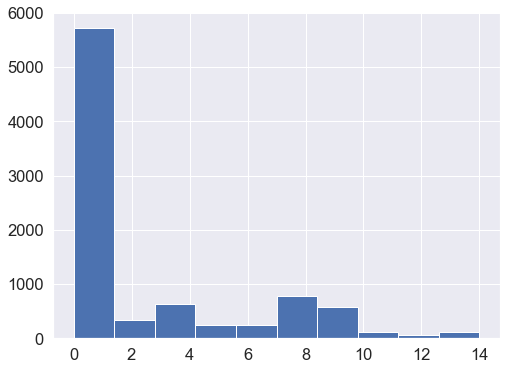

In [787]:
plt.figure(figsize=(8,6))
plt.hist(data.Work_Experience)

label=pd.Categorical(data.Segmentation,categories=['A','B','C','D']).codes
data.drop(['Segmentation'],axis=1,inplace=True)
label

In [788]:
correlation_data=pd.DataFrame(data)
correlation_data.drop(['ID'],axis=1,inplace=True)
correlation_data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,1,61,1,1.0,2,3.0,5,C,0,0,0,0,1,0,0,0,0
1,1,1,63,1,0.0,2,5.0,5,C,0,0,0,0,1,0,0,0,0
2,0,1,39,1,0.0,1,3.0,5,C,1,0,0,0,0,0,0,0,0
3,0,0,23,0,1.0,0,4.0,5,D,0,0,0,0,0,1,0,0,0
4,0,0,18,0,7.0,0,4.0,5,D,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,1,1,43,1,0.0,1,2.0,5,C,1,0,0,0,0,0,0,0,0
10691,1,0,31,1,1.0,0,4.0,5,D,1,0,0,0,0,0,0,0,0
10692,0,0,22,0,1.0,0,3.0,5,D,1,0,0,0,0,0,0,0,0
10693,1,1,66,1,0.0,1,3.0,5,A,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

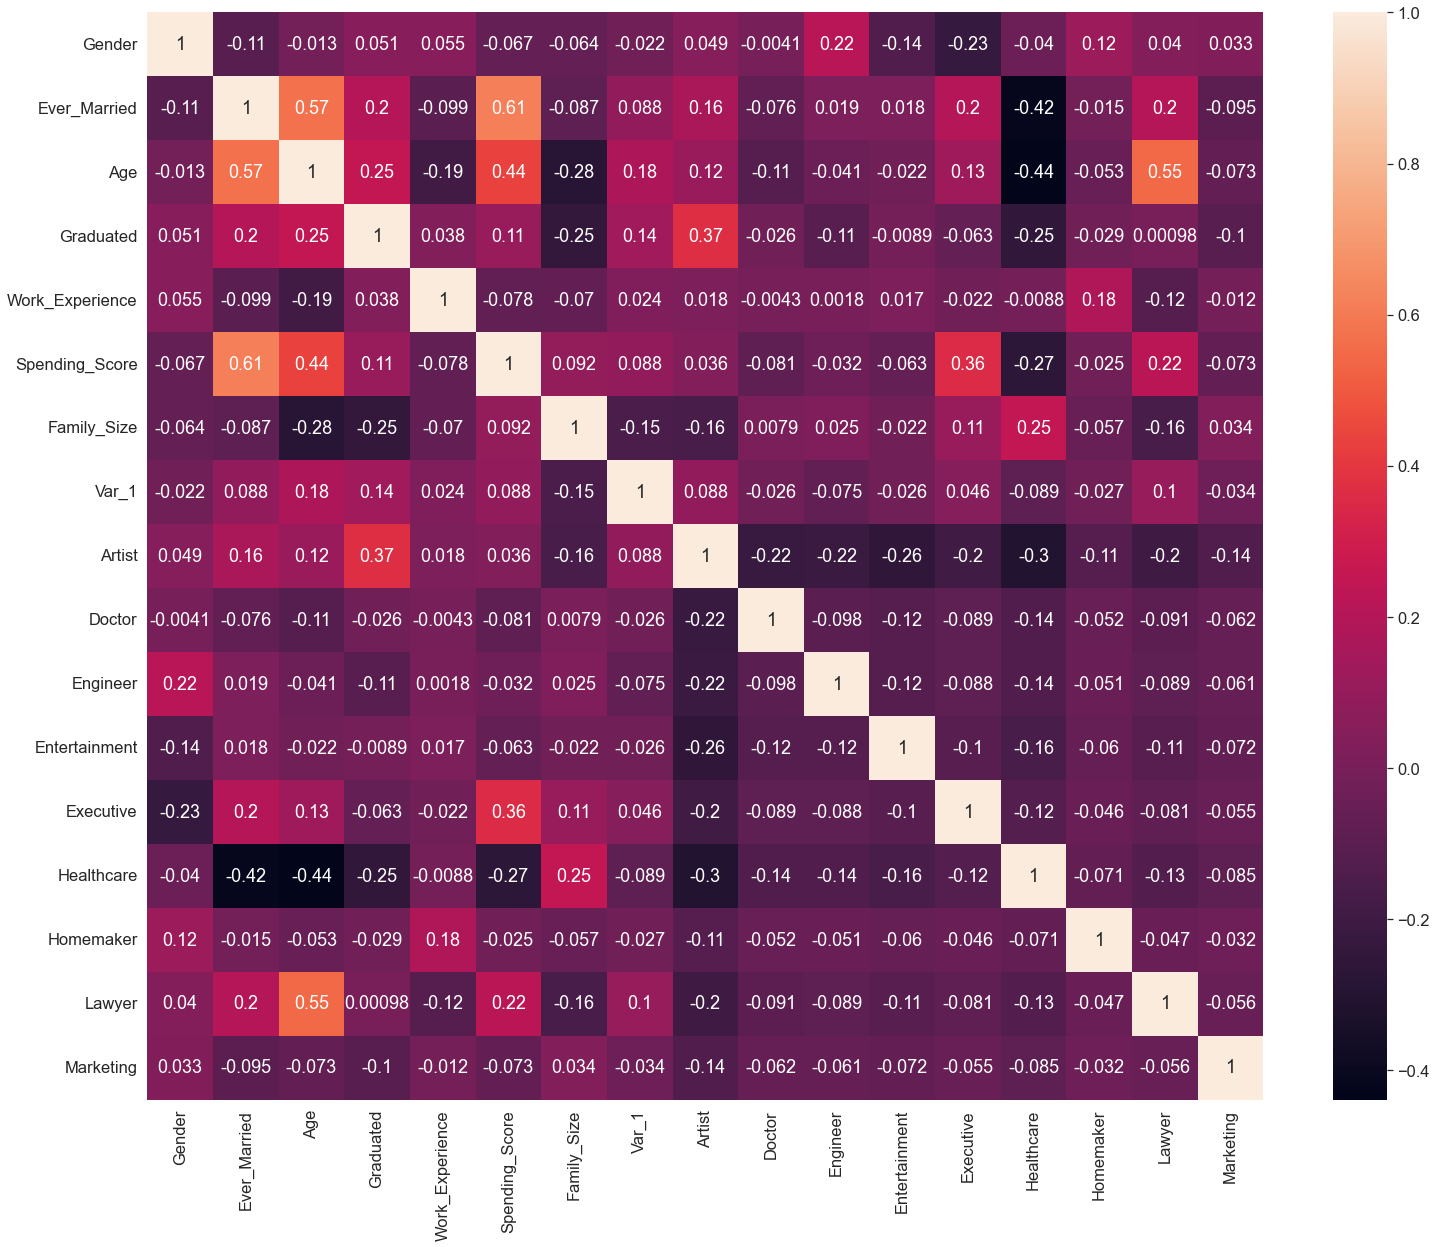

In [789]:
plt.figure(figsize=(25,20))
sns.heatmap(correlation_data.corr(),annot=True)

In [812]:
# generic class to fit and predict k-means cluster

class k_means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def model_fit(self,data):

        self.centroids = {}

        # select k points to begin
        
        for i in range(self.k):
            self.centroids[i] = data[i]

        # use initial centroids to label data rows to various k vales, then calculate updated centroids value and repeat iterations till max_iteration or if the labels stop changing in consecutive iterations
        
        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for features in data:
                distances = [np.linalg.norm(features-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(features)
                
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            opt = True

            for c in self.centroids:
                orig_centroid = prev_centroids[c]
                curr_centroid = self.centroids[c]
                if np.sum((curr_centroid-orig_centroid)/orig_centroid*100.0) > self.tol:
                    opt = False

            if opt:
                return opt

    def model_predict(self,data):
        classification = []
        
        # returns the classification list
        for d_row in range(len(data)):
            distances = [np.linalg.norm(data[d_row]-self.centroids[centroid]) for centroid in self.centroids]
            classification.append(distances.index(min(distances)))
            
        return classification

# graph plotting function which can be extended to k = 11

def plot_graph (centroids_data, classification_data, k=2):
    color_lst = mcp.gen_color(cmap="cividis", n=k)
    mark_lst = ['x', '^', '>', '<', '8', 's', 'p', 'h', 'H', 'd', 'D']
    
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    
    for centroid in centroids_data:
        ax.scatter(centroids_data[centroid][0], centroids_data[centroid][1],
                marker="o", color="blue", s=150, linewidths=5)

    for classification in classification_data:
        color = color_lst[classification]
        mark =  mark_lst[classification]
        for featureset in classification_data[classification]:
                ax.scatter(featureset[0], featureset[1], featureset[2], marker=mark, color=color, linewidths=5)
    
    plt.show()
    

In [813]:
# PCA

def principalComponentAnalysis (data, n_components):

    # mean centering the data 
    X_mean = data - np.mean(data , axis = 0)

    # calculating the covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_mean , rowvar = False)

    # calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #sort the eigenvalues in descending order
    sorted_vec = np.argsort(eigen_values)[::-1]
    
    sorted_eigenvalue = eigen_values[sorted_vec]
    
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:,sorted_vec]

    # select the first n eigenvectors, n is desired dimension of our final reduced data.
    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

    #Transform the data 
    X_reduced = np.dot(eigenvector_subset.transpose(),X_mean.transpose()).transpose()
    
    return X_reduced


In [814]:
# Calculating cost function for various values of k
def cost_function(data, trials=1):
    costs = []
    for i in range(1,trials):
        kmeans = k_means(k=i)
        kmeans.model_fit(data)
        cluster_assignments = kmeans.centroids
        # This has the distance from their respective centroides for evaluation purposes
        cost = 0
        for cluster in cluster_assignments:
            for feature in kmeans.classifications[cluster]:
                dist = np.linalg.norm(feature - cluster_assignments[cluster])**2
                cost += dist
        
        costs.append(np.array(cost))

    return costs
  
# Plotting cost functions obtained to analyze optimal value of k      
def plot_costs(costs, trials=1):
    x = np.arange(1,trials)
    plt.plot(x,costs)
    plt.title("Elbow curve")
    plt.xlabel("K -->")
    plt.ylabel("Dispersion")

In [815]:
# Split a dataset into a train and test set
def train_test_split(df, frac=0.2):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)

    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

In [816]:
train, test = train_test_split(correlation_data, frac=0.7)

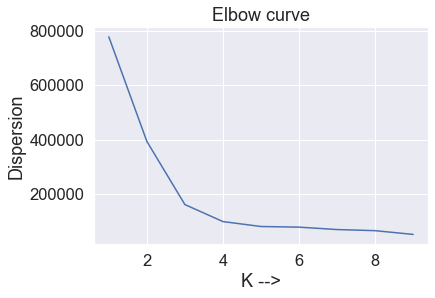

In [817]:
# apply model fit on the training data
train_x = train.drop('Segmentation', axis=1)
train_x = train[['Age', 'Graduated', 'Work_Experience', 'Spending_Score']].values
train_y = train.Segmentation
train_y = pd.Categorical(train_y,categories=['A','B','C','D'],ordered=True).codes

# implement PCA since we have 4 features
updated_x = principalComponentAnalysis(train_x, 3)

cost_arr = cost_function(updated_x, trials=10)

plot_costs(cost_arr, trials=10)


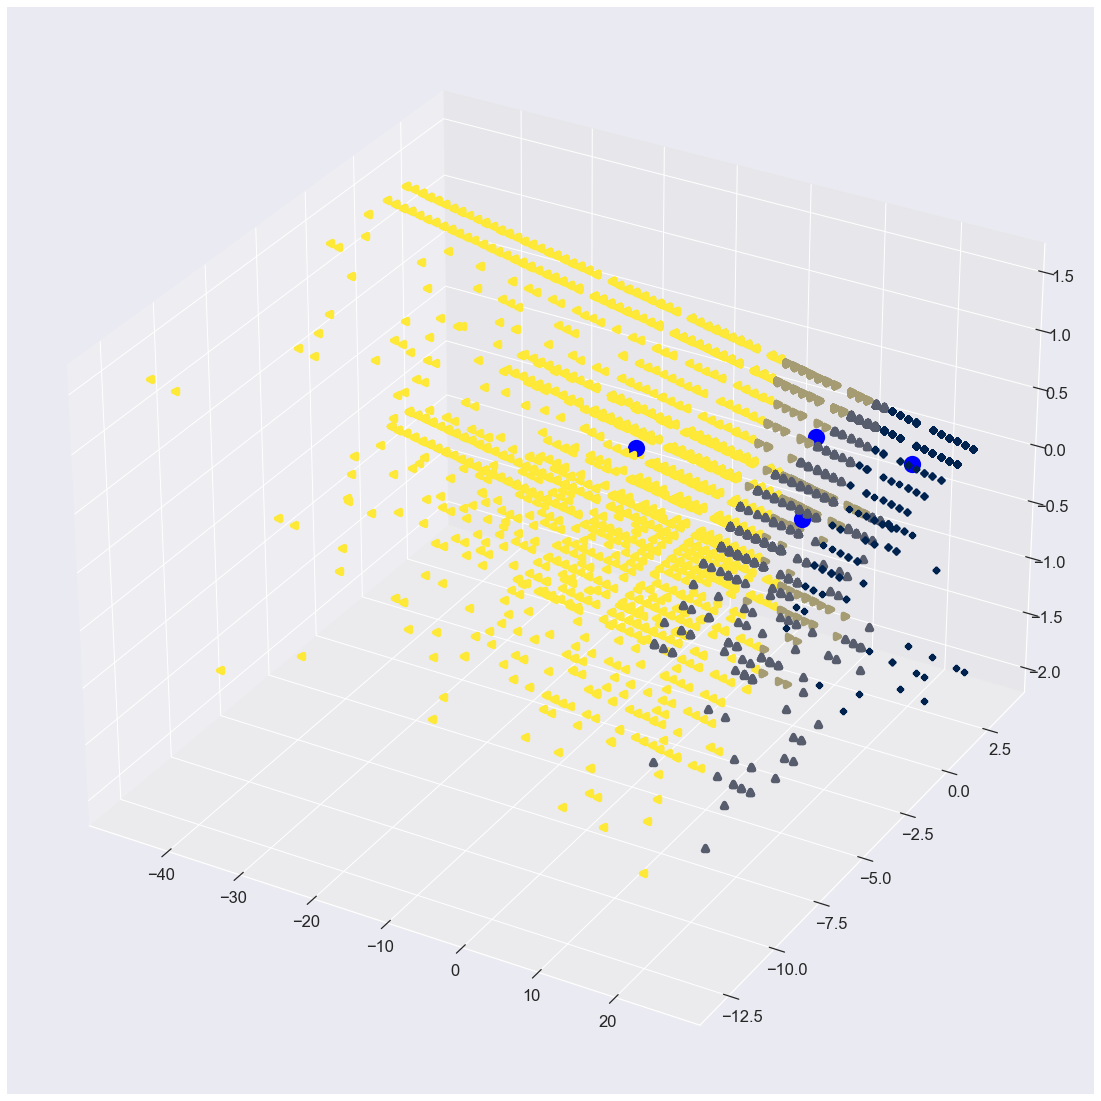

In [820]:
# apply model fit on the training data
test_x = test.drop('Segmentation', axis=1)
test_x = test[['Age', 'Graduated', 'Work_Experience', 'Spending_Score']].values
test_y = test.Segmentation
test_y = pd.Categorical(test_y,categories=['A','B','C','D'],ordered=True).codes

# implement PCA since we have 4 features
updated_test_x = principalComponentAnalysis(test_x, 3)

test_kmeans = k_means(k=4)
test_kmeans.model_fit(updated_test_x)

plot_graph(test_kmeans.centroids, test_kmeans.classifications, k=4)

In [821]:
out_y = test_kmeans.model_predict(updated_test_x)

correct_labels = sum(test_y == out_y)

print(adjusted_rand_score(test_y, out_y))

0.04367054197470147
